## Customer Analysis

#OVERVIEW

A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.
Create a model using : Train Dataset

#GOALS

The objective of this exercise is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it using Test dataset.


# Data Dictionary

#People
● ID: Customer's unique identifier
● Year_Birth: Customer's birth year
● Education: Customer's education level
● Marital_Status: Customer's marital status
● Income: Customer's yearly household income
● Kidhome: Number of children in customer's household
● Teenhome: Number of teenagers in customer's household
● Dt_Customer: Date of customer's enrollment with the company
● Recency: Number of days since customer's last purchase
● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#Products
● MntWines: Amount spent on wine in last 2 years
● MntFruits: Amount spent on fruits in last 2 years
● MntMeatProducts: Amount spent on meat in last 2 years
● MntFishProducts: Amount spent on fish in last 2 years
● MntSweetProducts: Amount spent on sweets in last 2 years
● MntGoldProds: Amount spent on gold in last 2 years

#Promotion
● NumDealsPurchases: Number of purchases made with a discount
● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#Place
● NumWebPurchases: Number of purchases made through the company’s website
● NumCatalogPurchases: Number of purchases made using a catalogue
● NumStorePurchases: Number of purchases made directly in stores
● NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Set the style for matplotlib plots
plt.style.use('seaborn')
    
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Overview 

In [2]:
# Data Loading and Overview 
df = pd.read_csv('customer_train.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0
1679,1679,1679,8230,1980,S1,Menikah,33228000.0,1,0,23-01-2014,...,7,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis (EDA)

In [4]:
print('Columns in Data:\n', df.columns)
print('Total rows and columns in Data:\n', df.shape)

Columns in Data:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Total rows and columns in Data:
 (1680, 31)


In [5]:
#removing unwanted column which is not required for ML model
df = df.drop(labels = ['Unnamed: 0.1', 'Unnamed: 0',], axis=1,)

In [6]:
# Define a values in the 'Marital_Status' to an appropriate English equivalent
marital_status_mapping = {
    'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widowed(female)',
    'duda': 'Widowed (male)'}

# Replace the values in the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
# Create a new column 'year' and set it to the current year, 2023.
df['year'] = 2023

# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract the year and create a new column 'Year_Customer'
df['Year_Customer'] = df['Dt_Customer'].dt.year

In [10]:
# Calculate customer age by subtracting 'Year_Birth' from the current year and store it in a new column 'Customer_Age'.
df['Customer_Age'] = df['year'] - df['Year_Birth']

# Calculate customer tenure by subtracting 'Year_Customer' from the current year and store it in a new column 'customer_tenure'.
df['customer_tenure'] = df['year'] - df['Year_Customer']

# Drop columns 'Year_Birth' and 'year' from the DataFrame.
df.drop(columns=['Year_Birth', 'year', 'Year_Customer','Dt_Customer' ], axis=1, inplace=True)

In [11]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,customer_tenure
0,5524,S1,Single,58138000.0,0,0,58,635000,88000,546000,...,0,0,0,0,0,3,11,1,66,11
1,2174,S1,Single,46344000.0,1,1,38,11000,1000,6000,...,0,0,0,0,0,3,11,0,69,9
2,4141,S1,Engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,0,0,0,3,11,0,58,10
3,6182,S1,Engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,0,0,0,3,11,0,39,9
4,5324,S3,Married,58293000.0,1,0,94,173000,43000,118000,...,0,0,0,0,0,3,11,0,42,9


## Customer Demographics:

- **Customer Demographics:** We have customer demographic information such as education, marital status, income, customer age, and tenure. These factors can help us understand the profile of our customers

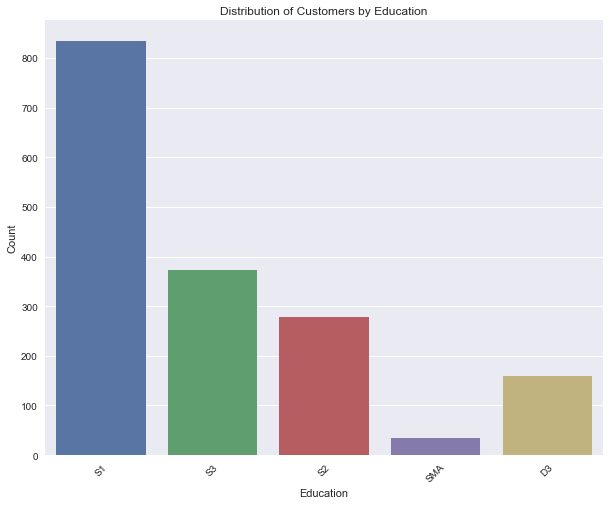

In [12]:
#Bar Chart for Education
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Education')

plt.title('Distribution of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

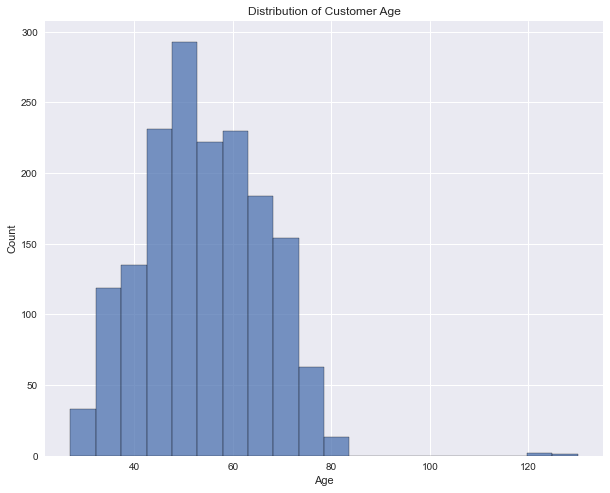

In [13]:
#Histogram for Customer Age
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Customer_Age', bins=20)

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

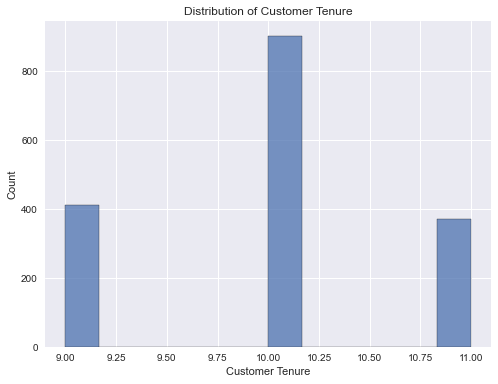

In [14]:
#Box Plot for Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='customer_tenure')

plt.title('Distribution of Customer Tenure')
plt.xlabel('Customer Tenure')

plt.show()

## Household Composition
The dataset includes the number of children (Kidhome) and teenagers (Teenhome) in customer households. We can analyze how family composition relates to customer behavior.

<Figure size 576x432 with 0 Axes>

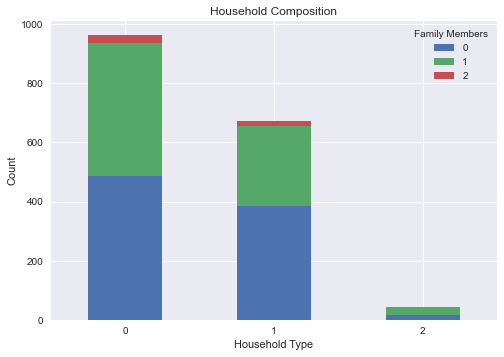

In [15]:
#Stacked Bar Chart for Kidhome and Teenhome
household_comp = df[['Kidhome', 'Teenhome']].value_counts().unstack()

plt.figure(figsize=(8, 6))
household_comp.plot(kind='bar', stacked=True)

plt.title('Household Composition')
plt.xlabel('Household Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Family Members', loc='upper right')

plt.show()

## Customer Spending Habits and Product Preferences

- **Customer Spending Habits:** The dataset contains spending data on various product categories like Coke, fruits, meat products, and more. We can investigate how different customer segments spend on these products.

- **Product Preferences:** By examining spending patterns, we can identify which products are most popular among customers and whether there are any seasonal trends in product purchases.

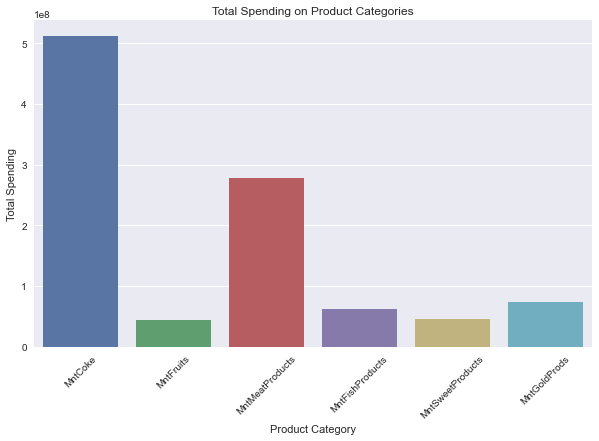

In [16]:
#Grouped Bar Chart for Product Categories
spending_categories = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df[spending_categories].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=spending_data.index, y=spending_data.values)

plt.title('Total Spending on Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)

plt.show()

### Promotion

- **Promotion Effectiveness:** The dataset includes information on campaigns (AcceptedCmp1 to AcceptedCmp5) and customer responses (Response). We can assess the effectiveness of these marketing campaigns and understand which ones resonate with customers.

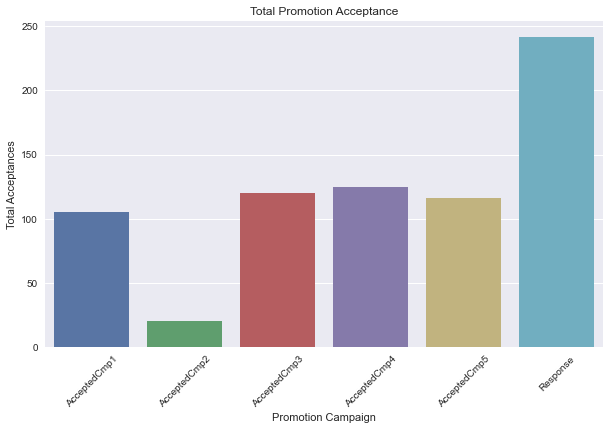

In [17]:
#Bar Chart for Promotion Acceptance

promotion_acceptance = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
promotion_counts = promotion_acceptance.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values)

plt.title('Total Promotion Acceptance')
plt.xlabel('Promotion Campaign')
plt.ylabel('Total Acceptances')
plt.xticks(rotation=45)

plt.show()

## Complaints and Campaigns
We can analyze whether customer complaints (Complain) impact their responses to marketing campaigns. Do customers who complain tend to respond differently to campaigns?

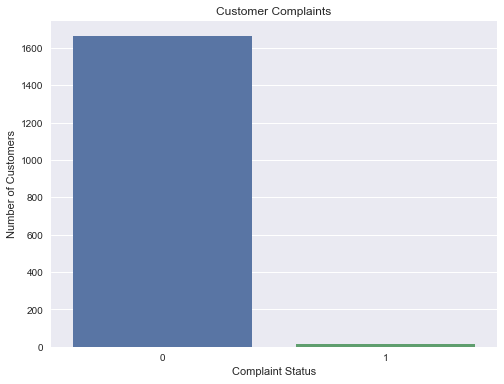

In [18]:
#Bar Chart for Complaints
complaint_counts = df['Complain'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)

plt.title('Customer Complaints')
plt.xlabel('Complaint Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.show()

# Customer Recency and Campaign Acceptance
Understanding the recency of customer purchases (Recency) in relation to campaign acceptance can help us tailor marketing strategies for different customer segments.

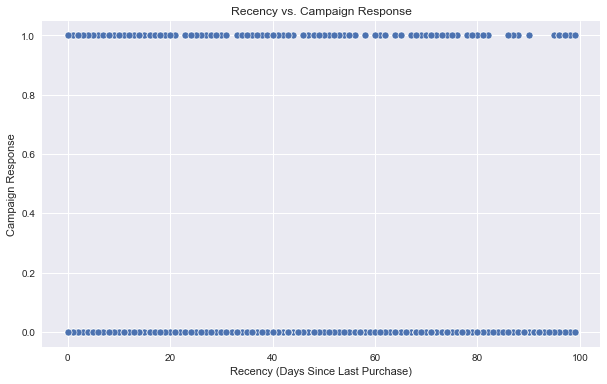

In [19]:
#Scatter Plot for Recency vs. Response

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Recency', y='Response')

plt.title('Recency vs. Campaign Response')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Campaign Response')
plt.xticks(rotation=0)

plt.show()

## Avg Number of Purchase by Channel

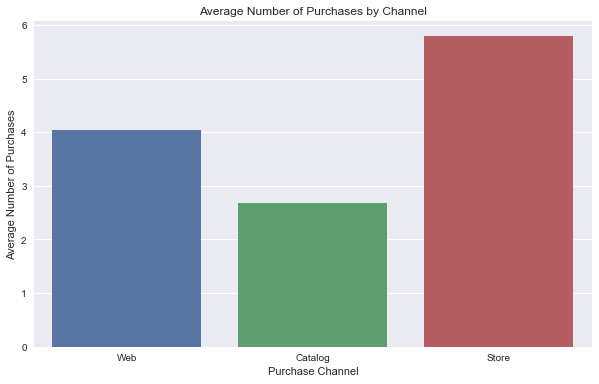

In [20]:
# Grouped bar chart for NumWebPurchases, NumCatalogPurchases, and NumStorePurchases
plt.figure(figsize=(10, 6))
sns.barplot(x=['Web', 'Catalog', 'Store'],
            y=[df['NumWebPurchases'].mean(), df['NumCatalogPurchases'].mean(), df['NumStorePurchases'].mean()])

plt.title('Average Number of Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')

plt.show()

In [21]:
#removing unwanted column which is not required for ML model
df = df.drop(labels = ['ID', 'Z_CostContact','Z_Revenue'], axis=1,)

## Encoding categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for 'Education' column
education_encoder = LabelEncoder()
df['Education'] = education_encoder.fit_transform(df['Education'])

# Create a label encoder for 'Marital_Status' column
marital_status_encoder = LabelEncoder()
df['Marital_Status'] = marital_status_encoder.fit_transform(df['Marital_Status'])

# Convert the encoded columns to int64 data type
df[['Education', 'Marital_Status']] = df[['Education', 'Marital_Status']].astype('int64')

In [23]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9


In [24]:
df.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
1675,0,2,20193000.0,0,0,18,8000,8000,22000,24000,...,4,0,0,0,0,0,0,0,32,11
1676,1,3,27573000.0,1,0,45,50000,15000,110000,39000,...,8,0,0,0,0,0,0,0,48,10
1677,4,4,15862000.0,1,0,26,1000,1000,4000,11000,...,8,0,0,0,0,0,0,0,44,10
1678,3,3,49544000.0,1,0,0,308000,0,73000,0,...,7,0,0,0,0,0,0,0,47,10
1679,1,3,33228000.0,1,0,28,22000,2000,31000,7000,...,7,0,0,0,0,0,0,0,43,9


In [25]:
# Summary of the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1680 non-null   int64  
 1   Marital_Status       1680 non-null   int64  
 2   Income               1663 non-null   float64
 3   Kidhome              1680 non-null   int64  
 4   Teenhome             1680 non-null   int64  
 5   Recency              1680 non-null   int64  
 6   MntCoke              1680 non-null   int64  
 7   MntFruits            1680 non-null   int64  
 8   MntMeatProducts      1680 non-null   int64  
 9   MntFishProducts      1680 non-null   int64  
 10  MntSweetProducts     1680 non-null   int64  
 11  MntGoldProds         1680 non-null   int64  
 12  NumDealsPurchases    1680 non-null   int64  
 13  NumWebPurchases      1680 non-null   int64  
 14  NumCatalogPurchases  1680 non-null   int64  
 15  NumStorePurchases    1680 non-null   i

In [26]:
# Find the missing values in each columns 
df.isnull().sum()

Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Customer_Age            0
customer_tenure         0
dtype: int64

In [27]:
# # Fill missing values in the 'Income' column with the median income value.
df["Income"].fillna(df["Income"].median(), inplace=True)

In [28]:
# Checking again if missing values still present
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_Age           0
customer_tenure        0
dtype: int64

In [29]:
# Summary statistics.
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
count,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,1.577976,2.695833,5.200661e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,0.144048,54.152381,9.975000
std,1.001424,1.209347,2.137358e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.351243,12.027192,0.681129
min,0.000000,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,9.000000
25%,1.000000,2.000000,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,10.000000
50%,1.000000,3.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,10.000000
75%,2.000000,3.000000,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,10.000000
max,4.000000,5.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,11.000000


# Overall visualization

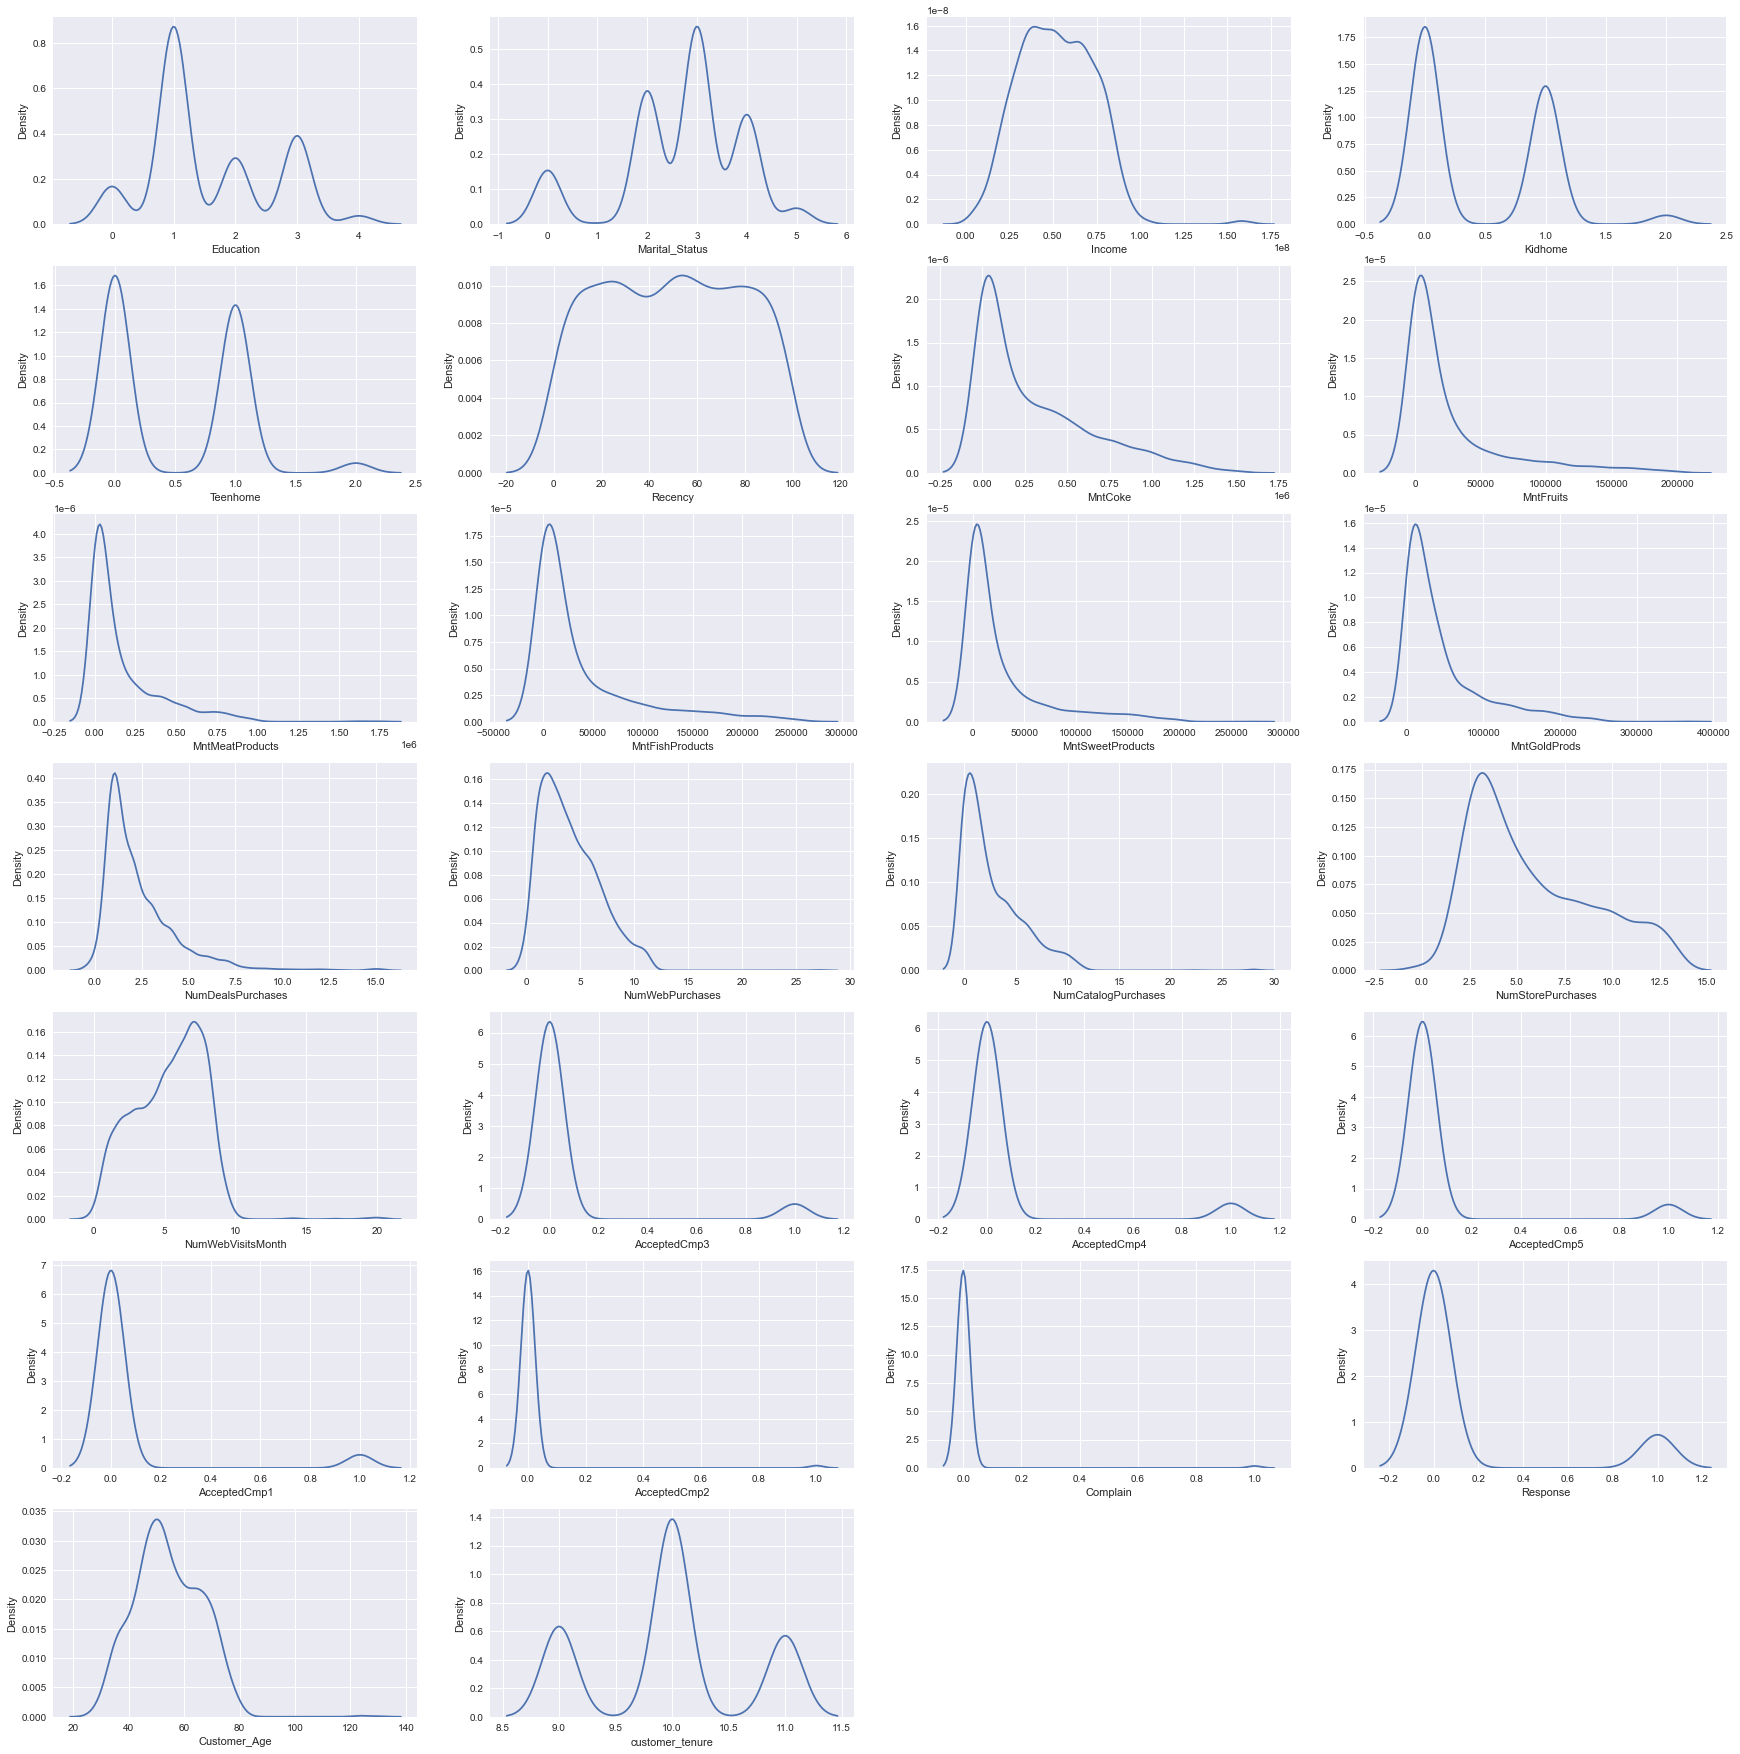

In [30]:
# Create a figure with a specified size (20 units wide and 10 units tall).
plt.figure(figsize=(30, 45))

# Loop through each column in the DataFrame.
for i, col in enumerate(df.columns):
    # Check if the column's data type is not 'object' (i.e., numeric).
    if df[col].dtype != 'object':
        # Create a subplot in a 6x4 grid layout and position it using 'i + 1'.
        ax = plt.subplot(10, 4, i + 1)
        
        # Plot the Kernel Density Estimate (KDE) for the current column.
        sns.kdeplot(df[col], ax=ax)
        
        # Set the x-axis label to the column name.
        plt.xlabel(col)

# Display the entire figure with subplots.
plt.show()

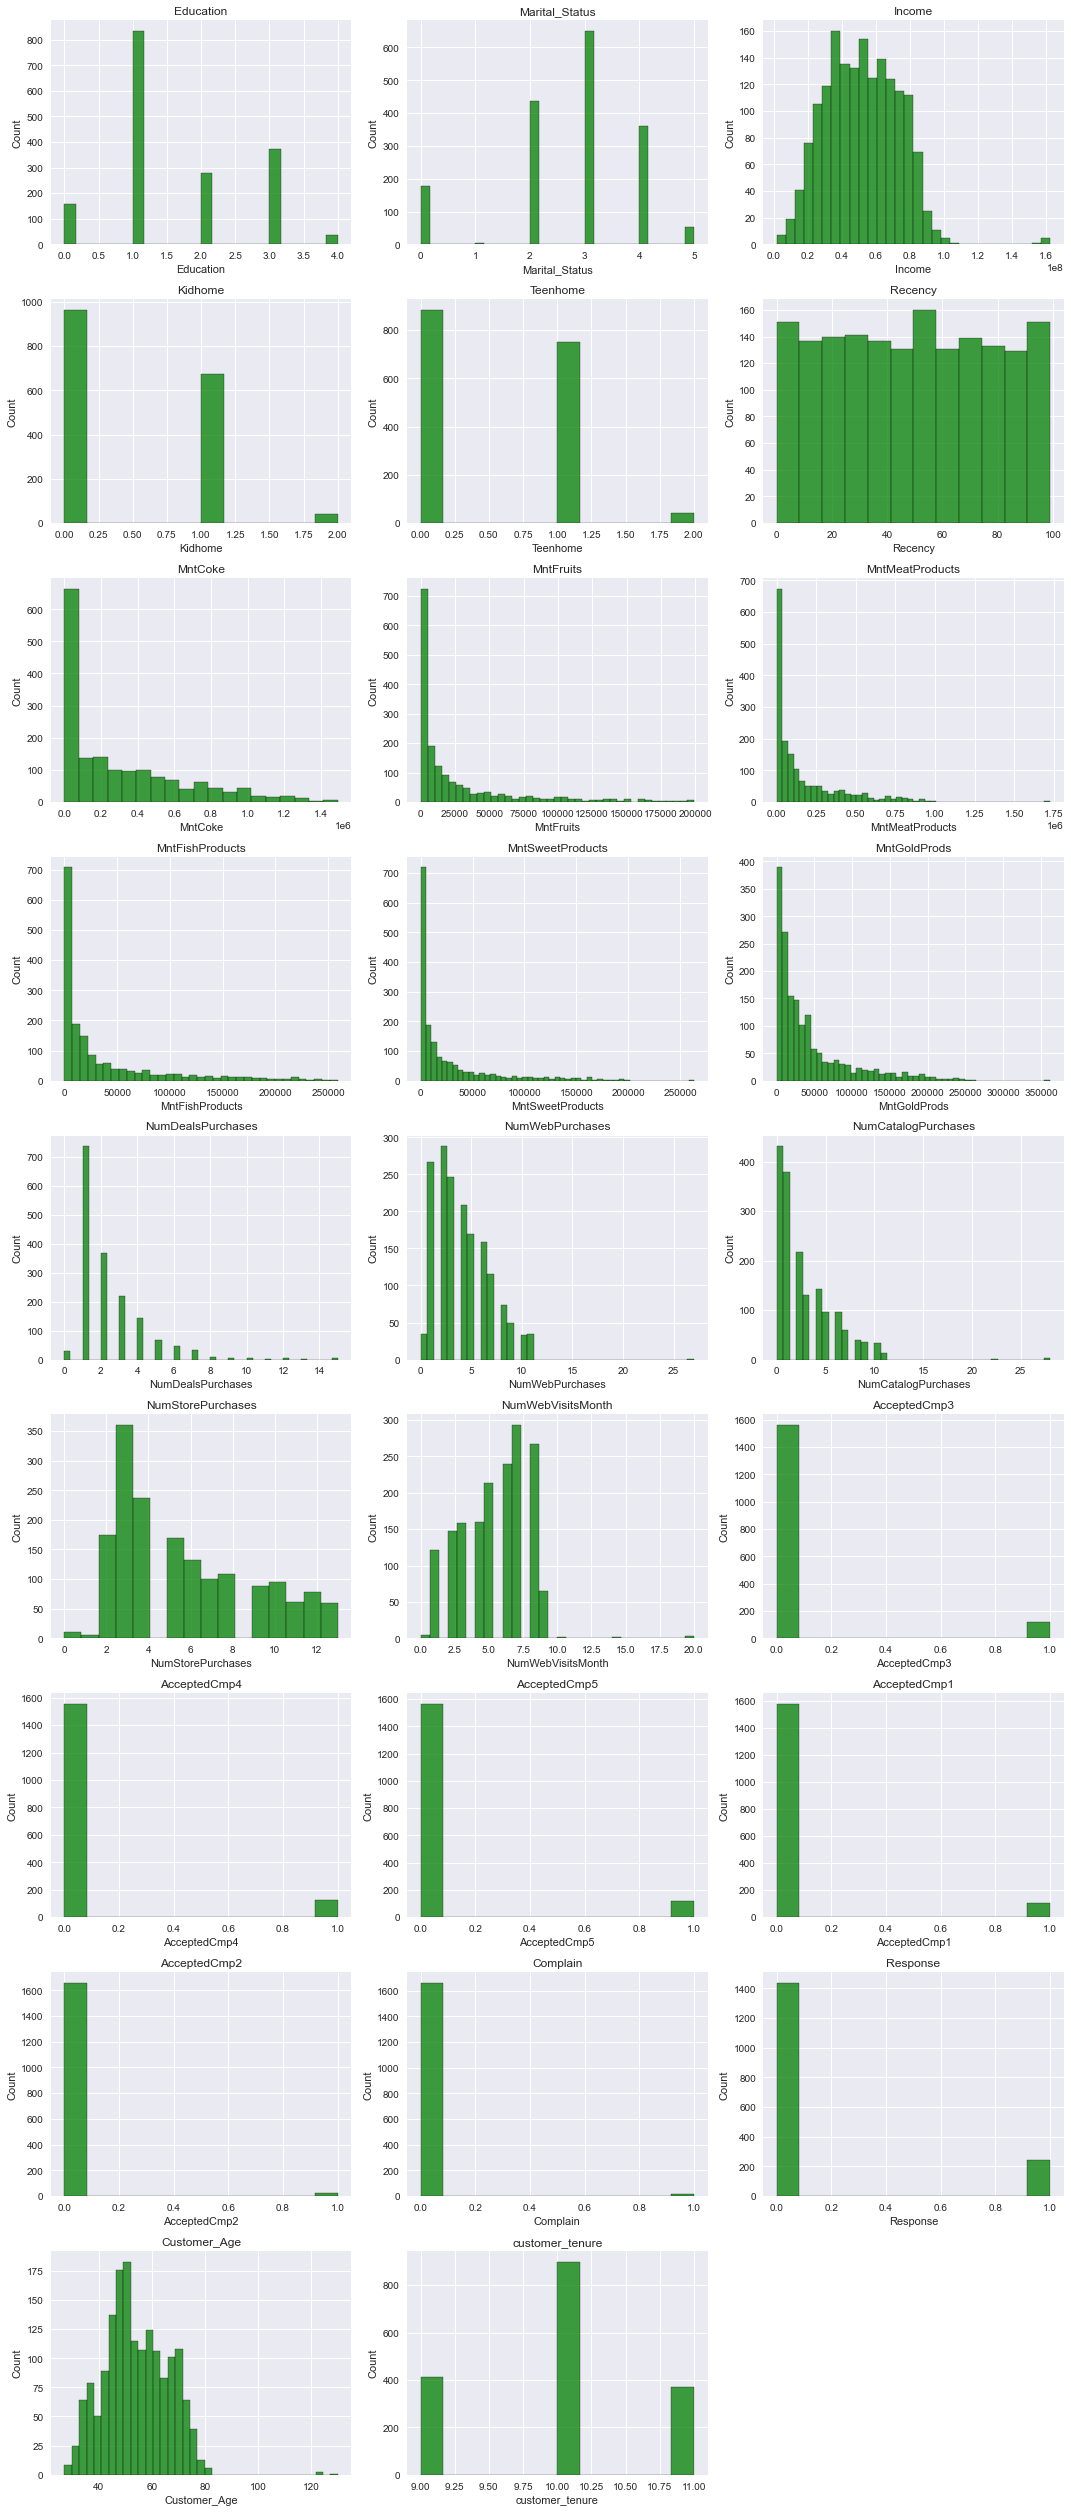

In [31]:
# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of subplots per line
n_rows = (26 + 1) // n_columns  # Calculate the number of lines

plt.figure(figsize=(15, 35))  

for i in range(0, 26):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(df[df.columns[i]], kde_kws={'color': 'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, color='g')
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

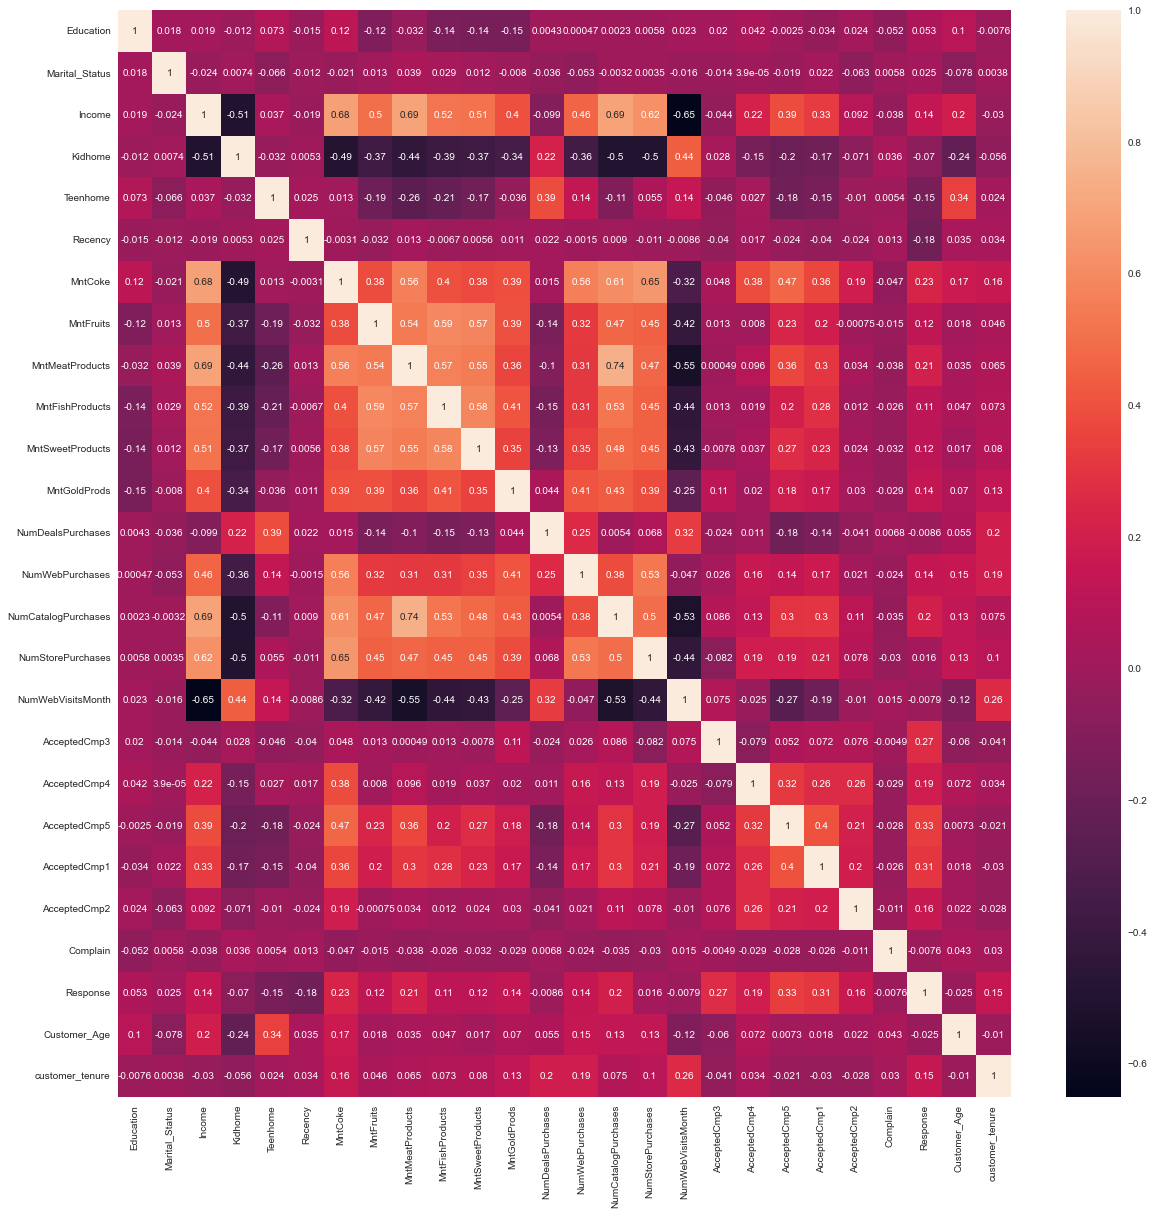

In [32]:
plt.figure(figsize =(20,20))
           
sns.heatmap(df.corr(), annot=True)
           
plt.show()

# Finding outliers and removing by using 'Age'

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

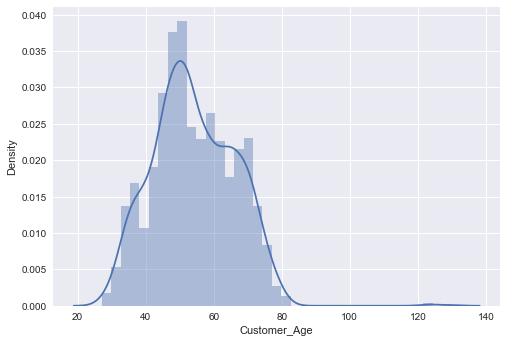

In [33]:
sns.distplot(df['Customer_Age'])

<AxesSubplot:xlabel='Customer_Age'>

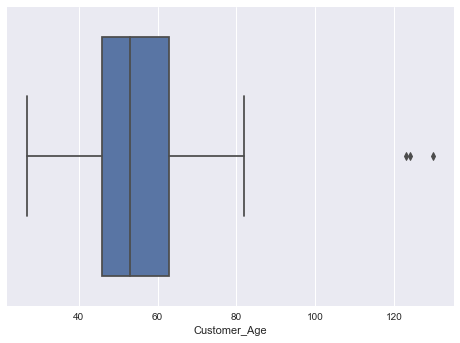

In [34]:
sns.boxplot(df['Customer_Age'])

# IQR Method
Q1 = .25 of data
Q3 = .75 of data

IQR = Q3 - Q1

Upper Limit = Q3 + (1.5*IQR)

Lower Limit = Q1 - (1.5*IQR)

In [35]:
Q1 = df['Customer_Age'].quantile(.25)
Q3 = df['Customer_Age'].quantile(.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [36]:
# Outliers -
IQR_Outlier = df.loc[(df['Customer_Age']>=upper_bound) | (df['Customer_Age']<= lower_bound )]

#Without Outlier 
IQR_without_Outlier =df.loc[(df['Customer_Age']<=upper_bound) & (df['Customer_Age']>= lower_bound )]

# Data Without Outliers
new_df = IQR_without_Outlier
new_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0,2,20193000.0,0,0,18,8000,8000,22000,24000,...,4,0,0,0,0,0,0,0,32,11
1676,1,3,27573000.0,1,0,45,50000,15000,110000,39000,...,8,0,0,0,0,0,0,0,48,10
1677,4,4,15862000.0,1,0,26,1000,1000,4000,11000,...,8,0,0,0,0,0,0,0,44,10
1678,3,3,49544000.0,1,0,0,308000,0,73000,0,...,7,0,0,0,0,0,0,0,47,10


In [39]:
# Old Data and New Data

print('Old Data with Outlier:', len(df))
print('New Data without Outlier:',len(new_df))
print ('Total Outliers:', len(IQR_Outlier))

Old Data with Outlier: 1680
New Data without Outlier: 1677
Total Outliers: 3


<AxesSubplot:xlabel='Customer_Age'>

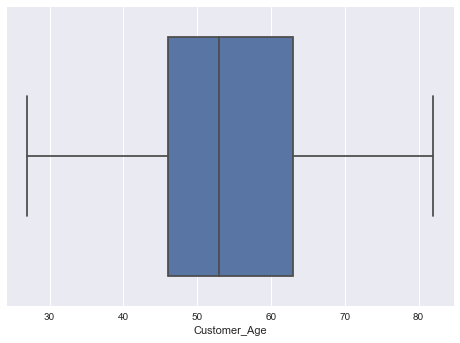

In [40]:
sns.boxplot(new_df['Customer_Age'])

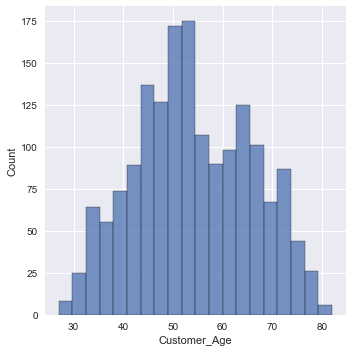

In [41]:
sns.displot(new_df['Customer_Age'])

In [42]:
new_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
0,1,4,58138000.0,0,0,58,635000,88000,546000,172000,...,7,0,0,0,0,0,0,1,66,11
1,1,4,46344000.0,1,1,38,11000,1000,6000,2000,...,5,0,0,0,0,0,0,0,69,9
2,1,2,71613000.0,0,0,26,426000,49000,127000,111000,...,4,0,0,0,0,0,0,0,58,10
3,1,2,26646000.0,1,0,26,11000,4000,20000,10000,...,6,0,0,0,0,0,0,0,39,9
4,3,3,58293000.0,1,0,94,173000,43000,118000,46000,...,5,0,0,0,0,0,0,0,42,9


In [43]:
new_df.shape

(1677, 26)

In [44]:
new_df.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_Age             int64
customer_tenure          int64
dtype: object

In [45]:
new_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Age',
       'customer_tenure'],
      dtype='object')

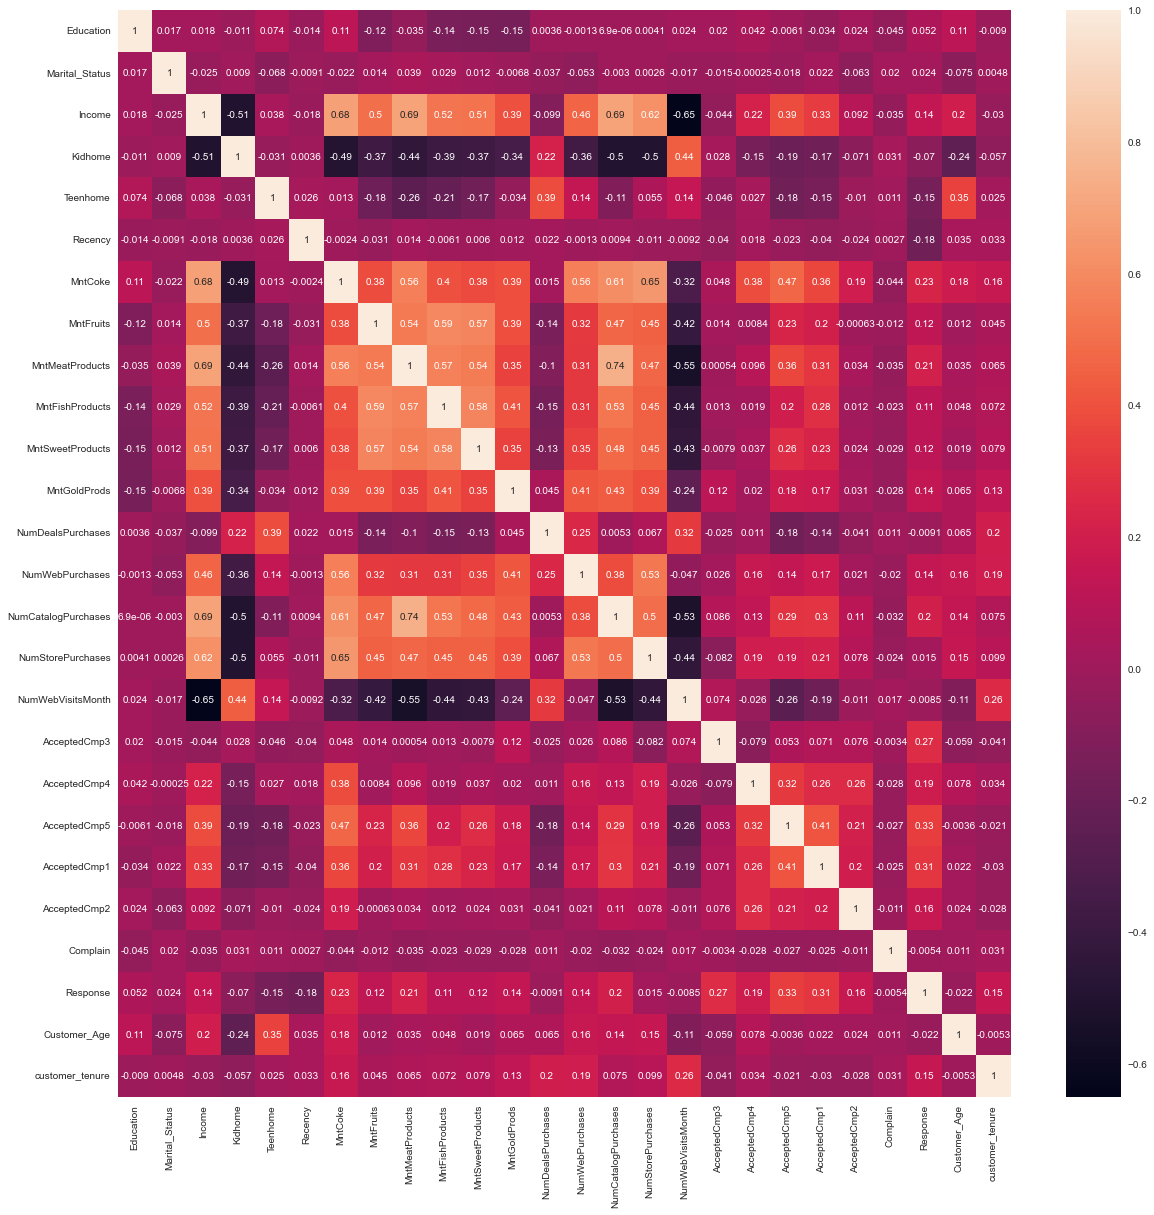

In [46]:
plt.figure(figsize =(20,20))
           
sns.heatmap(new_df.corr(), annot=True)
           
plt.show()

## Scaling the DataFrame

In [47]:
scaler=StandardScaler()

scaled_df = scaler.fit_transform(new_df)

#Create a DataFrame with scaled features
scaled_df = pd.DataFrame(data=scaled_df, columns=new_df.columns)
scaled_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
0,-0.579048,1.078814,0.287619,-0.827652,-0.909671,0.308614,0.974724,1.575077,1.696889,2.493384,...,0.679643,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,2.435108,1.028244,1.504068
1,-0.579048,1.078814,-0.264322,1.001034,0.908587,-0.383107,-0.868284,-0.630678,-0.712751,-0.645282,...,-0.137097,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,1.285830,-1.432279
2,-0.579048,-0.577178,0.918228,-0.827652,-0.909671,-0.798139,0.357434,0.586290,-0.172814,1.367157,...,-0.545468,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,0.341349,0.035895
3,-0.579048,-0.577178,-1.186158,1.001034,-0.909671,-0.798139,-0.868284,-0.554617,-0.650279,-0.497580,...,0.271273,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-1.290028,-1.432279
4,1.421083,0.250818,0.294872,1.001034,-0.909671,1.553710,-0.389811,0.434169,-0.212974,0.167078,...,-0.137097,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-1.032442,-1.432279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,-1.579113,-0.577178,-1.488148,-0.827652,-0.909671,-1.074827,-0.877144,-0.453203,-0.641355,-0.239102,...,-0.545468,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-1.891062,1.504068
1673,-0.579048,0.250818,-1.142776,1.001034,-0.909671,-0.141004,-0.753096,-0.275729,-0.248673,0.037839,...,1.088013,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-0.517271,0.035895
1674,2.421148,1.078814,-1.690832,1.001034,-0.909671,-0.798139,-0.897819,-0.630678,-0.721676,-0.479118,...,1.088013,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-0.860718,0.035895
1675,1.421083,0.250818,-0.114567,1.001034,-0.909671,-1.697375,0.008917,-0.656031,-0.413778,-0.682208,...,0.679643,-0.277617,-0.283798,-0.271337,-0.258445,-0.109864,-0.098147,-0.410659,-0.603133,0.035895


In [48]:
scaled_df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_Age           0
customer_tenure        0
dtype: int64

# Dimensionality reduction 
Converting the DataFrame into 2D DataFrame for visualization

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])

pca_df

,PCA1,PCA2
0,3.832220,0.166145
1,-2.363946,-0.368664
2,1.743582,-0.039019
3,-2.591268,-1.676631
4,-0.473109,-0.302536
...,...,...
1672,-1.740045,-1.822722
1673,-1.895844,-0.249028
1674,-3.068537,-1.252112
1675,-1.273264,0.007492


## Hyperparameter tuning 
## Finding 'k' value by Elbow Method

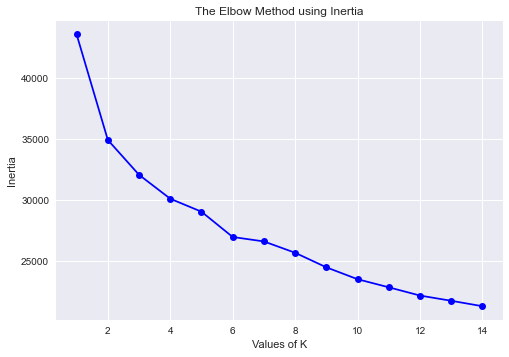

In [50]:
# Initialize the range of cluster values (K)
range_val = range(1, 15)

# Create an empty list to store the inertia values
inertia = []

# Loop through different values of K
for i in range_val:
    # Create a KMeans model with 'i' clusters
    kmeans = KMeans(n_clusters=i)
    
    # Fit and predict using the scaled dataset
    kmeans.fit_predict(scaled_df)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range_val, inertia, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

# Model Building using KMeans

In [58]:
# Choose the optimal K value based on the Elbow Method
optimal_k = 4  # Replace with the value you determined from the elbow plot

# Create a KMeans model with the optimal K value
kmeans = KMeans(n_clusters=optimal_k)

# Fit and predict using the scaled dataset
cluster_assignments = kmeans.fit_predict(scaled_df)

# Add cluster assignments to the original dataset
df_with_clusters = pd.concat([pca_df, pd.DataFrame({'Cluster': cluster_assignments})], axis=1)
df_with_clusters

,PCA1,PCA2,Cluster
0,3.832220,0.166145,1
1,-2.363946,-0.368664,0
2,1.743582,-0.039019,1
3,-2.591268,-1.676631,0
4,-0.473109,-0.302536,0
...,...,...,...
1672,-1.740045,-1.822722,0
1673,-1.895844,-0.249028,0
1674,-3.068537,-1.252112,0
1675,-1.273264,0.007492,0


## Visualizing the clustered dataframe

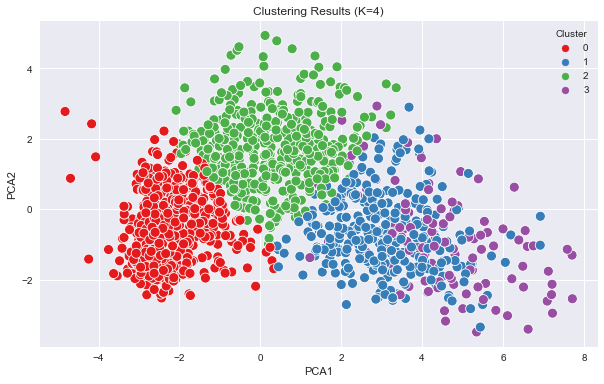

In [53]:
# Visualize the clustered data
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_with_clusters, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Clustering Results (K={})'.format(optimal_k))

plt.show()

In [57]:
df_with_clusters.shape

(1677, 3)

In [63]:
df_with_clusters.describe()

,PCA1,PCA2,Cluster
count,1.677000e+03,1.677000e+03,1677.000000
mean,-1.490890e-16,-2.555433e-17,0.965414
std,2.587192e+00,1.463428e+00,1.006540
min,-4.828001e+00,-3.488876e+00,0.000000
25%,-2.339255e+00,-1.117509e+00,0.000000
50%,-6.560878e-01,-2.406201e-01,1.000000
75%,2.035957e+00,1.009253e+00,2.000000
max,7.713079e+00,4.938333e+00,3.000000


In [65]:
# Find all cluster centers
cluster_centers = kmeans.cluster_centers_

# Inverse transform the cluster centers to the original scale
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)

# Create a DataFrame to store the cluster centers with the same columns as your original DataFrame
cluster_centers_df = pd.DataFrame(data=cluster_centers_original_scale, columns=new_df.columns)

# Display the cluster centers
print("Cluster Centers (Original Scale):")
cluster_centers_df

Cluster Centers (Original Scale):


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,customer_tenure
0,1.557464,2.755614,3.484813e+07,0.813738,0.425363,49.416116,37841.479524,5177.014531,22945.838838,7052.840159,...,6.496697,0.080581,0.006605,-3.053113e-16,0.001321,2.642008e-03,1.321004e-02,0.096433,50.751651,9.867900
1,1.428571,2.836735,7.304972e+07,0.034985,0.221574,49.040816,493204.081633,69705.539359,433020.408163,103279.883382,...,2.807580,0.067055,0.032070,8.326673e-17,0.116618,-2.081668e-17,5.830904e-03,0.154519,55.058309,9.973761
2,1.734066,2.516484,5.672374e+07,0.270330,0.931868,49.096703,451193.406593,18850.549451,123380.219780,25942.857143,...,5.909890,0.048352,0.127473,-2.775558e-17,0.021978,6.593407e-03,8.791209e-03,0.098901,58.749451,10.164835
3,1.557377,2.614754,8.151929e+07,0.065574,0.139344,47.000000,888073.770492,57278.688525,458122.950820,77032.786885,...,3.098361,0.114754,0.418033,9.426230e-01,0.442623,1.229508e-01,1.734723e-18,0.581967,53.803279,9.942623


# Visualisation

<AxesSubplot:xlabel='Cluster', ylabel='count'>

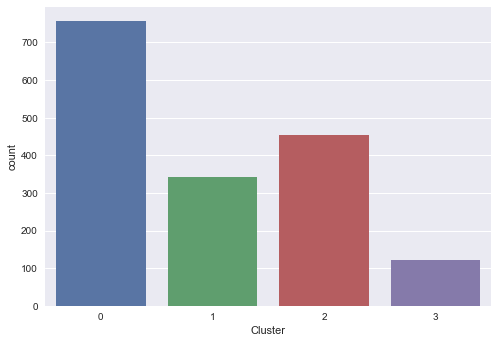

In [66]:
#Visualization
sns.countplot(x='Cluster', data=df_with_clusters)

# Saving the kmeans clustering model and the data with cluster label

In [68]:
from joblib import dump

# Save the KMeans model to a file
model_filename = 'CA_kmeans_model.joblib'
dump(kmeans, model_filename)

['CA_kmeans_model.joblib']

In [70]:
# Specify the CSV file name
csv_filename = 'Clustered_CustomerAnalysis_Data.csv'

# Save the DataFrame to a CSV file
df_with_clusters.to_csv(csv_filename, index=False)

# Training and Testing the model accuracy using decision tree

In [71]:
#Split Dataset
X = df_with_clusters.drop(['Cluster'],axis=1)
y = df_with_clusters[['Cluster']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [72]:
X_train

,PCA1,PCA2
1038,-2.838908,1.202400
1429,4.671039,-1.877835
441,-2.501498,-1.610752
1262,6.619912,-3.408697
903,3.562044,-1.473647
...,...,...
86,-2.066105,1.601859
1037,1.217174,0.579297
977,-2.297821,-0.812980
276,2.959359,-2.374637


In [73]:
X_test

,PCA1,PCA2
907,3.019924,-0.971660
1507,3.271585,-2.518084
706,-2.263626,-1.677629
1596,-2.139457,-1.944752
997,2.051450,1.438436
...,...,...
1606,0.309885,0.234607
358,0.169829,1.172446
794,1.746010,2.766249
886,1.935587,-0.684325


In [74]:
#Decision_Tree
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [75]:
#Confusion_Matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[230   0   1   0]
 [  1  77   2  17]
 [  4   4 130   4]
 [  0  14   3  17]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       231
           1       0.81      0.79      0.80        97
           2       0.96      0.92      0.94       142
           3       0.45      0.50      0.47        34

    accuracy                           0.90       504
   macro avg       0.80      0.80      0.80       504
weighted avg       0.90      0.90      0.90       504



# Saving the Decision tree model for future prediction

In [76]:
import pickle
filename = 'final_CA_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9007936507936508 % Acuuracy


## Research Review Pointers